In [1]:
# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes , make_regression
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,root_mean_squared_error

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X , y = make_regression(n_samples=100 , n_informative=1 , n_features=1 , n_targets=1 ,noise = 20 , random_state= 43 )
# Here we made our own regression dataset using the make_regression by passing parameters for our columns :
#   targeted columns , no of rows (samples) , some noise to add and the random state.

In [3]:
X.shape,y.shape # Examine the shape

((100, 1), (100,))

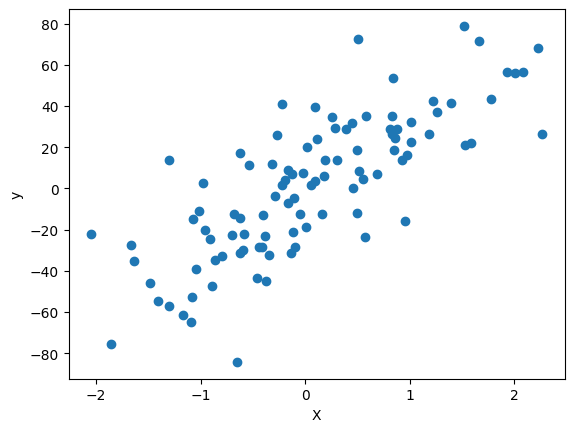

In [4]:
# Lets visualize this 
plt.scatter(X,y) # Scatterplot of X on x axis and y on y axis
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [5]:
# Now we will try to fit a line for this using Simple Linear Regression 
lr = LinearRegression() 

In [6]:
lr.fit(X,y) # Fit the model so the model learns on the given data
# We should have gone with the train test split first but we are doing this just for the sake of testing so we didnt.

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
lr.coef_,lr.intercept_  # Examine the intercept and the coef to later compare 

(array([27.87627188]), np.float64(-0.25717505392589146))

In [8]:
y_pred_lr = lr.predict(X) # Store the prediction

In [9]:
# Now we will do this same procedure but with the help of Ridge regression model where we have to set a alpha value
# Note the alpha is the lambda hyperparameter proved during derivation.
# We will check for differnt alpha values to look for better values

In [10]:
rr = Ridge(alpha=10)
rr.fit(X,y)
y_pred_rr = rr.predict(X)
rr.coef_,rr.intercept_

(array([25.14908023]), np.float64(-0.08104584654436997))

In [11]:
rr1 = Ridge(alpha=25)
rr1.fit(X,y)
y_pred_rr1 = rr1.predict(X)
rr1.coef_,rr1.intercept_

(array([21.93078164]), np.float64(0.12680033915492706))

In [12]:
rr2 = Ridge(alpha=100)
rr2.fit(X,y)
y_pred_rr2 = rr2.predict(X)
rr2.coef_,rr2.intercept_

(array([13.37369838]), np.float64(0.6794392768103245))

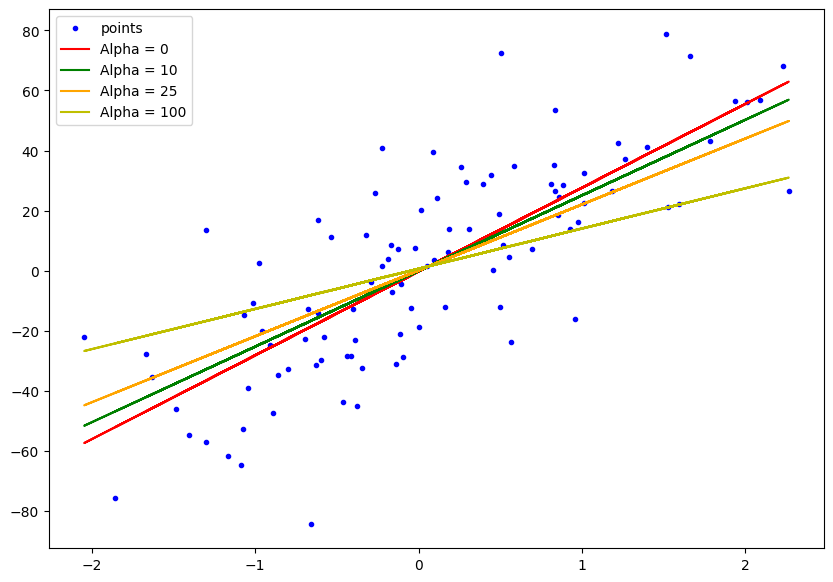

In [19]:
# Now lets do a comparsion plot to compare all the models used till now
plt.figure(figsize=(10,7))
plt.plot(X,y,'b.',label='points')
plt.plot(X,y_pred_lr,'r',label='Alpha = 0')
plt.plot(X,y_pred_rr,'g',label='Alpha = 10')
plt.plot(X,y_pred_rr1,'orange',label='Alpha = 25')
plt.plot(X,y_pred_rr2,'y',label='Alpha = 100')
plt.legend()
plt.show()

In [ ]:
# The alpha value of 10 and 25 is the best fit among all the alpha values .
# The values below overfit (red) line and the values above underfit (yellow).

In [ ]:
# For the further steps we will use the diabetes dataset , use the Ridge steps and try to replicate it using our own regressor.

X , y = load_diabetes(return_X_y=True) # Loading the diabetes dataset

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state= 42) # Split into training and testing set .

rdg = Ridge(alpha=0.1,solver='cholesky') # Initialize the ridge regressor.

rdg.fit(X_train,y_train) # Fit the parameters

y_pred_rdg = rdg.predict(X_test) # Store the predictions

In [ ]:
rdg.coef_,rdg.intercept_ # Examine the coeffecient and the intercept

(array([  42.85566976, -205.49431899,  505.08903304,  317.0932049 ,
        -108.50026183,  -86.23673333, -190.36318008,  151.70708637,
         392.28931896,   79.9081772 ]),
 np.float64(151.45857456679613))

In [ ]:
r2_score(y_test,y_pred_rdg),root_mean_squared_error(y_test,y_pred_rdg) # Calculate the r2score and the rmse value.

(0.46085219464119254, 53.446111997699646)

In [ ]:
# Now we will implement Ridge Regression from scratch
class RidgeRegressor:

    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.intercept = None
        self.coef = None
    
    def fit(self,X_train,y_train):
        # We insert a column at the start with ones for the intercept also to be placed and calculated 
        # together which will be extracted later.
        X_train = np.insert(X_train,0,1,axis=1) # Specifies the place index value and axis of the insertion

        # Now we create the identity matrix using the no of columns
        i = np.identity(X_train.shape[1]) # We need the identity matrix as it was placed when factorizing w in derivation of the equation.

        #i[0][0] = 0 # To replicate the Ridge model (of scikit-learn) as it was researched that they use this method.

        # Now lets write the equation for w / matrix of coef and intercept
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * i) .dot(X_train.T) .dot(y_train) # The X.T IS same as np.transpose(X)

        # No we can fetch the coef and intercept from this matrix
        self.intercept = result[0]
        self.coef = result[1:]

    def predict(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept


In [ ]:
ridge = RidgeRegressor() # Instantiate the model

In [ ]:
ridge.fit(X_train,y_train) # fit the model

In [ ]:
ridge.coef,ridge.intercept # compare the intercept and coeffecient values with other models

(array([  42.85566976, -205.49431899,  505.08903304,  317.0932049 ,
        -108.50026183,  -86.23673333, -190.36318008,  151.70708637,
         392.28931896,   79.9081772 ]),
 np.float64(151.45857456679607))

In [ ]:
y_pred_rr3 = ridge.predict(X_test) # Store prediction for metric test

In [ ]:
r2_score(y_test,y_pred_rr3),root_mean_squared_error(y_test,y_pred_rr3) # Calculate the r2score and rmse and compare .

(0.46085219464119254, 53.446111997699646)